In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

## 1. Preprocessing

1. Read the file [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) to a dataframe.
2. Remove the `pageviews`, we will cluster the users only by the number of the commits and their average difference.

In [4]:
df = pd.read_csv('../../datasets/regression.csv')
df.drop(columns= 'pageviews', inplace=True)
df

,uid,num_commits,AVG(diff)
0,user_1,62,-64.400000
1,user_10,20,-74.800000
2,user_14,61,-159.000000
3,user_17,51,-61.600000
4,user_18,5,-5.666667
5,user_19,118,-98.750000
6,user_21,65,-95.500000
7,user_25,79,-92.600000
8,user_28,60,-86.400000
9,user_3,18,-105.400000


## 2. KMeans

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters, use `random_state=21` and `n_clusters=3`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `n_clusters` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [5]:
X = df[['num_commits','AVG(diff)']].values

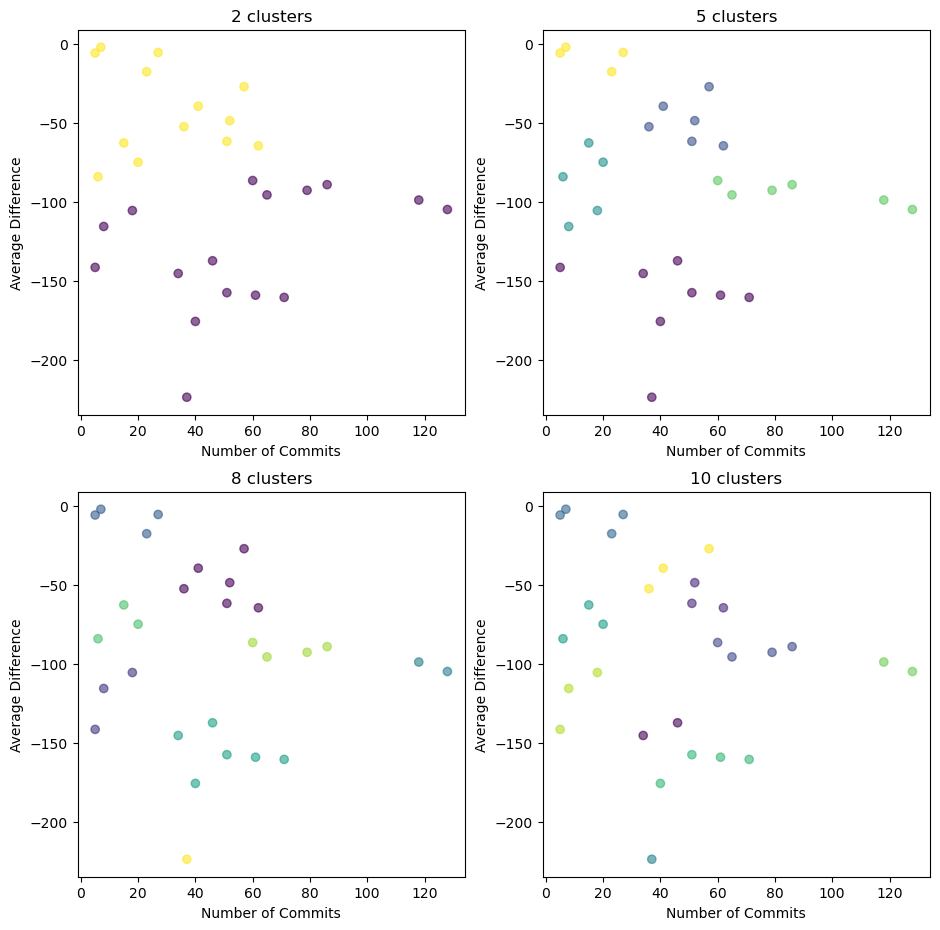

In [6]:
plt.figure(figsize=(11,11))
score = {}
ax=plt.subplot(2, 2, 1)
y=1
for g in [2,5,8,10]:
    plt.subplot(2,2,y)
    plt.title(f'{g} clusters')
    KM = KMeans(n_clusters=g, random_state=21,  n_init=10)
    predict = KM.fit_predict(X)
    scatter=plt.scatter(df['num_commits'], df['AVG(diff)'], c=predict, cmap='viridis', alpha=0.6)
    plt.xlabel('Number of Commits')
    plt.ylabel('Average Difference')
    score[f'silhouette_score for {g} cusler'] = silhouette_score(X, predict)
    y+=1

In [7]:
score

{'silhouette_score for 2 cusler': 0.41787451607810133,
 'silhouette_score for 5 cusler': 0.4760630149229996,
 'silhouette_score for 8 cusler': 0.5077985556562201,
 'silhouette_score for 10 cusler': 0.422635550349281}

## 3. DBSCAN

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters with `eps=20` and `min_samples=2`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `eps` and `min_samples` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

0.38339641455696616

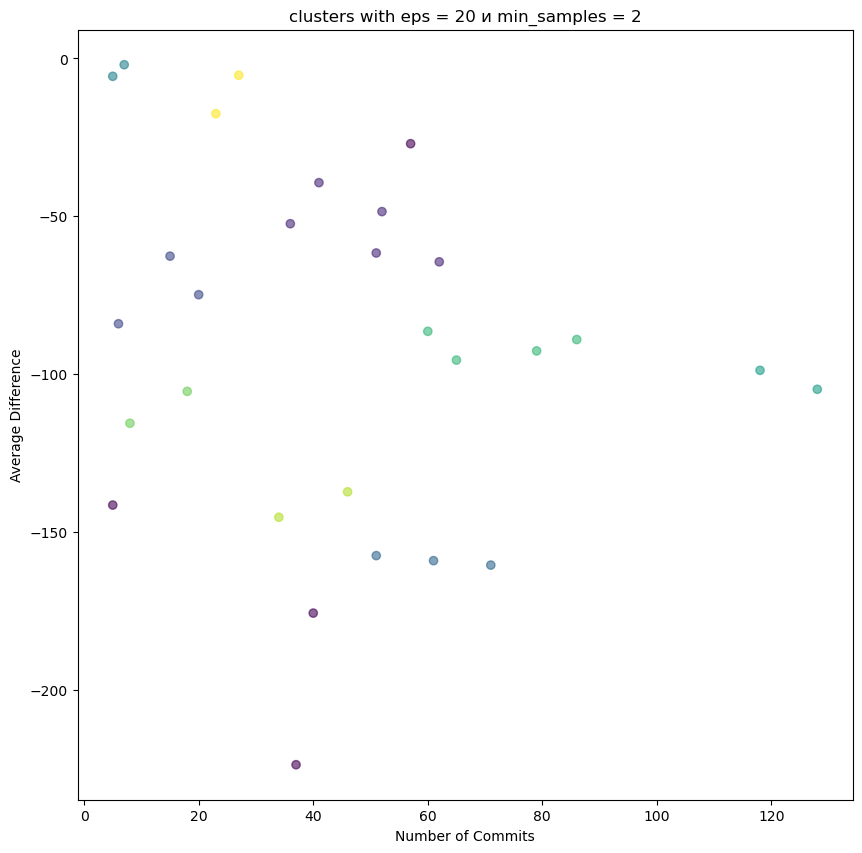

In [8]:
dbscan = DBSCAN(eps=20, min_samples=2)
clusters = dbscan.fit_predict(X)
plt.figure(figsize=(10,10))
plt.title('clusters with eps = 20 и min_samples = 2')
plt.scatter(df['num_commits'], df['AVG(diff)'], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel('Number of Commits')
plt.ylabel('Average Difference')
silhouette_score(X, clusters)


Silhouette_score for eps = 30 и min_samples = 2 -  0.19881722125199422
Silhouette_score for eps = 10 и min_samples = 2 -  -0.07923479818777454
Silhouette_score for eps = 22 и min_samples = 1 -  0.48713041554757475
Silhouette_score for eps = 20 и min_samples = 4 -  -0.02732781275391744


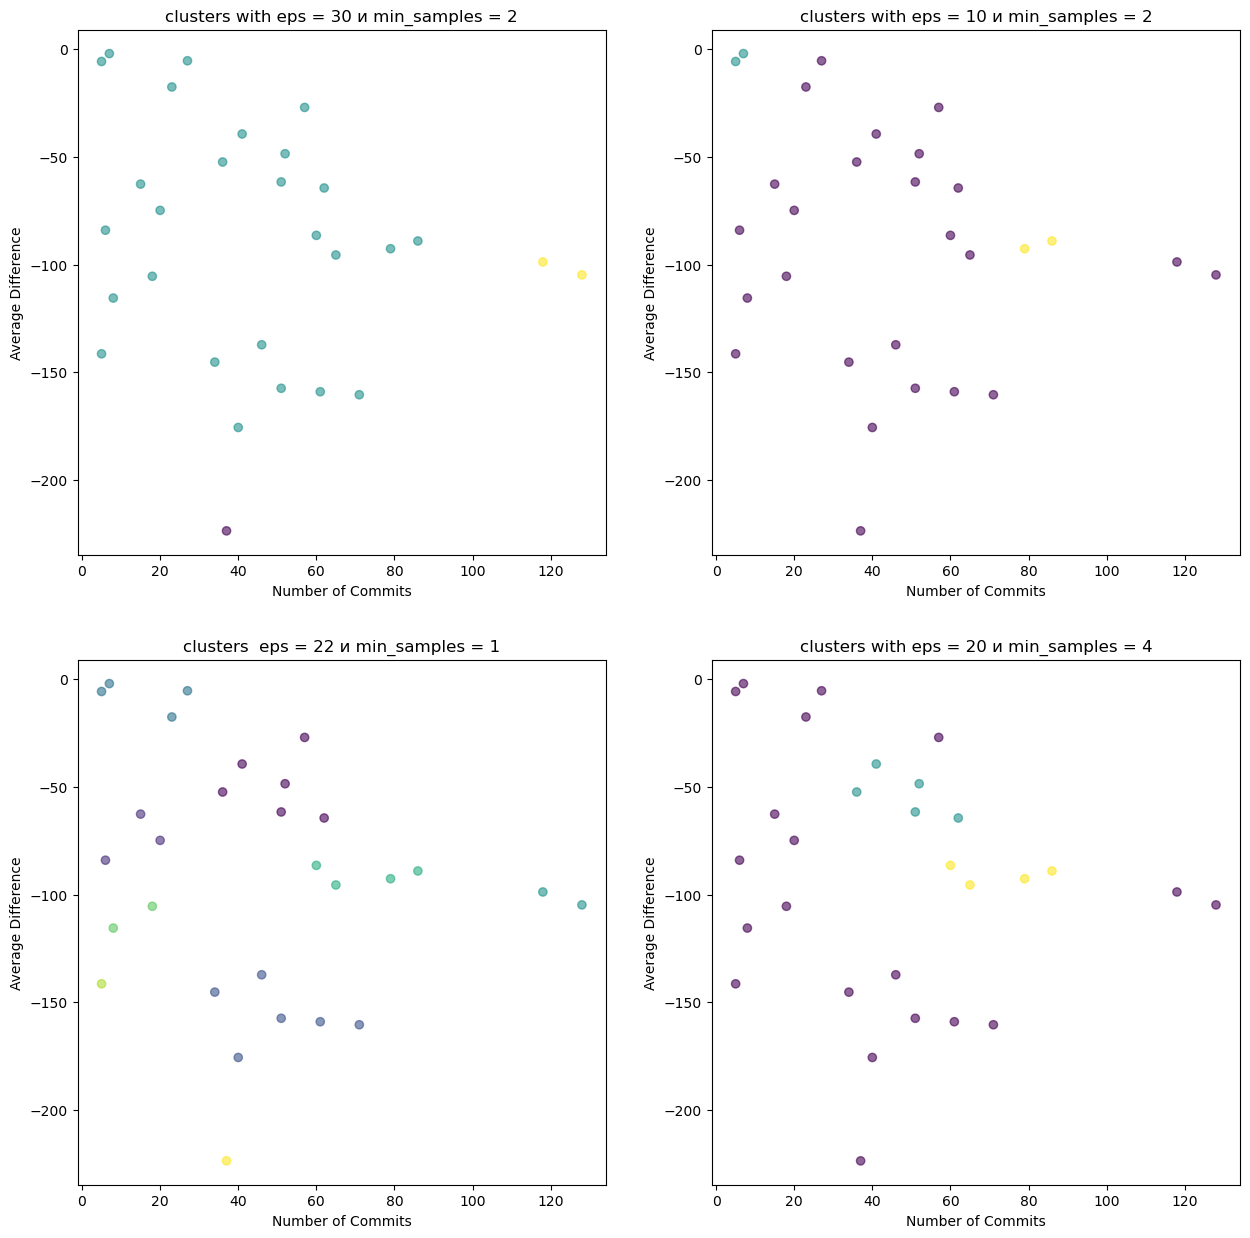

In [9]:
plt.figure(figsize=(15,15))
plt.subplot(2, 2, 1)
plt.title('clusters with eps = 30 и min_samples = 2')

dbscan = DBSCAN(eps=30, min_samples=2).fit(X)
clusters1 = dbscan.fit_predict(X)
plt.scatter(df['num_commits'], df['AVG(diff)'], c=clusters1, cmap='viridis', alpha=0.6)
plt.xlabel('Number of Commits')
plt.ylabel('Average Difference')
print('Silhouette_score for eps = 30 и min_samples = 2 - ', silhouette_score(X, clusters1))
plt.subplot(2, 2, 2)
plt.title('clusters with eps = 10 и min_samples = 2')

dbscan = DBSCAN(eps=10, min_samples=2).fit(X)
clusters2 = dbscan.fit_predict(X)
plt.scatter(df['num_commits'], df['AVG(diff)'], c=clusters2, cmap='viridis', alpha=0.6)
plt.xlabel('Number of Commits')
plt.ylabel('Average Difference')
print('Silhouette_score for eps = 10 и min_samples = 2 - ', silhouette_score(X, clusters2))
ax=plt.subplot(2, 2, 3)
plt.title('clusters  eps = 22 и min_samples = 1')

dbscan = DBSCAN(eps=22, min_samples=1).fit(X)
clusters3 = dbscan.fit_predict(X)
plt.scatter(df['num_commits'], df['AVG(diff)'], c=clusters3, cmap='viridis', alpha=0.6)
plt.xlabel('Number of Commits')
plt.ylabel('Average Difference')
print('Silhouette_score for eps = 22 и min_samples = 1 - ', silhouette_score(X, clusters3))
ax=plt.subplot(2, 2, 4)
plt.title('clusters with eps = 20 и min_samples = 4')

dbscan = DBSCAN(eps=20, min_samples=4).fit(X)
clusters4 = dbscan.fit_predict(X)
plt.scatter(df['num_commits'], df['AVG(diff)'], c=clusters4, cmap='viridis', alpha=0.6)
plt.xlabel('Number of Commits')
plt.ylabel('Average Difference')
print('Silhouette_score for eps = 20 и min_samples = 4 - ', silhouette_score(X, clusters4))

## 4. Hierarchical (AgglomerativeClustering)

1. Use this algorithm to create clusters with `n_clusters=5`.
2. Visualize the data on a `scatter plot`.
3. Try different values of `n_clusters` and see how your plot will change.
4. Calculate the `silhouette_score`.
5. Visualize the `dendrogram`.

n_clusters = 2 - Silhouette_score = 0.35902490572221984
n_clusters = 5 - Silhouette_score = 0.46383015199381467
n_clusters = 8 - Silhouette_score = 0.5077985556562201
n_clusters = 10 - Silhouette_score = 0.431193930539333


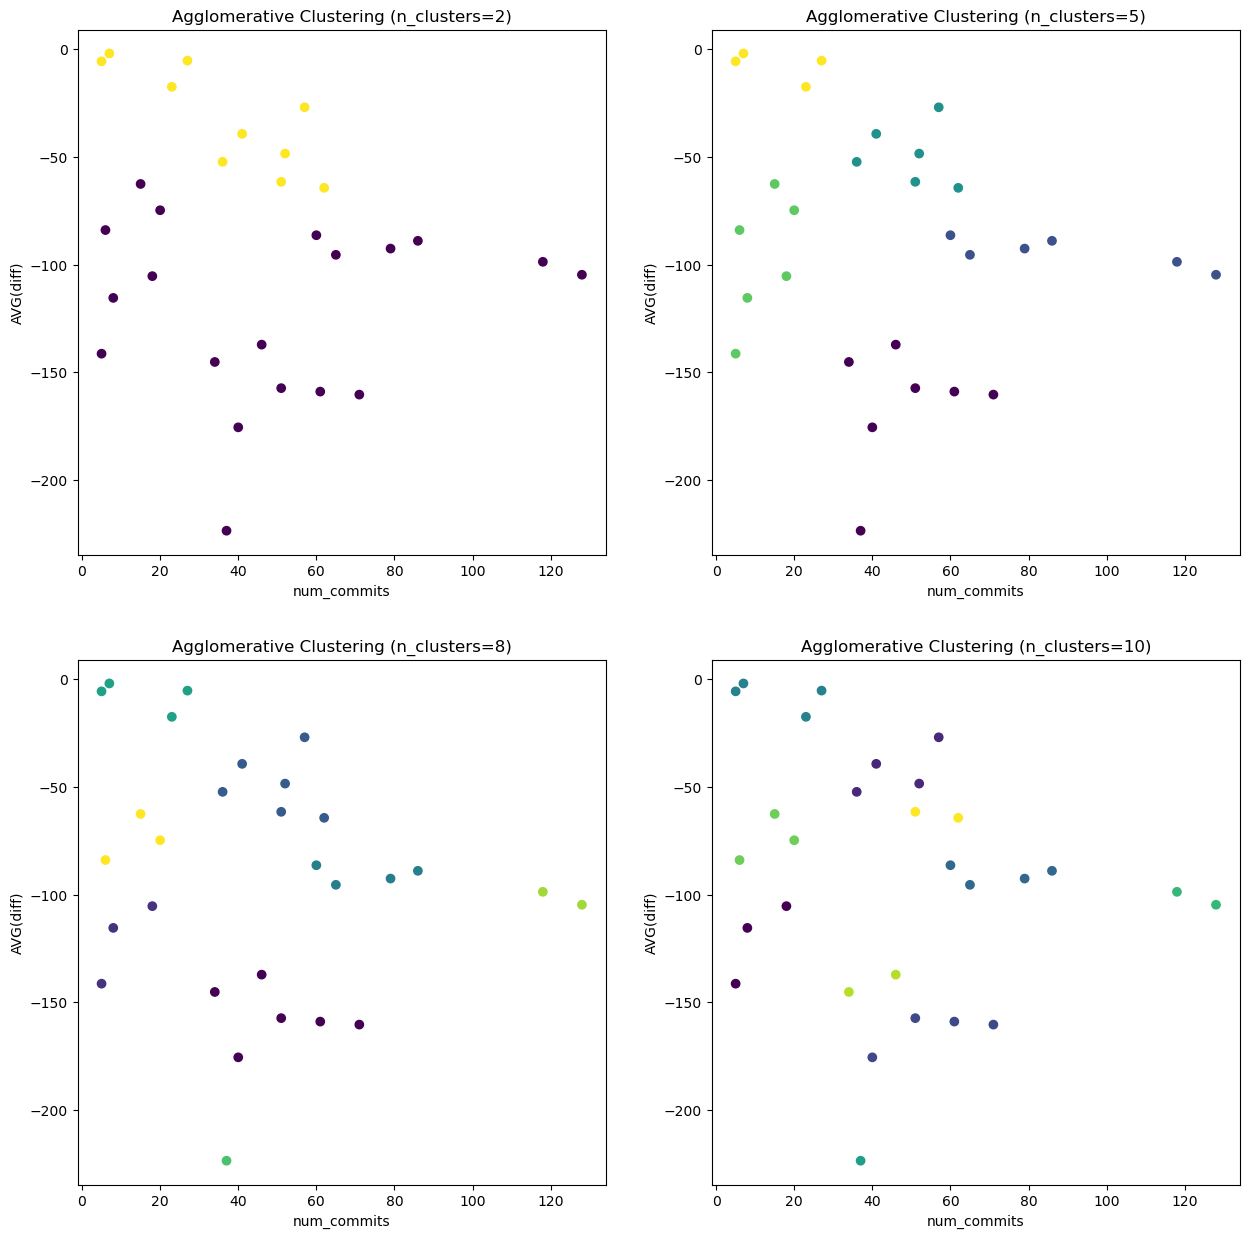

In [10]:
plt.figure(figsize=(15, 15))
y=1
for i in [2,5,8,10]:
    plt.subplot(2,2,y)
    hierarchical_cluster = AgglomerativeClustering(n_clusters=i, metric='euclidean', linkage='ward').fit(X)
    labels = hierarchical_cluster.fit_predict(X)
    plt.scatter(df['num_commits'], df['AVG(diff)'], c=labels, cmap='viridis')
    plt.xlabel('num_commits')
    plt.ylabel('AVG(diff)')
    plt.title(f'Agglomerative Clustering (n_clusters={i})')
    print(f'n_clusters = {i} - Silhouette_score = {silhouette_score(X,labels)}')
    y+=1

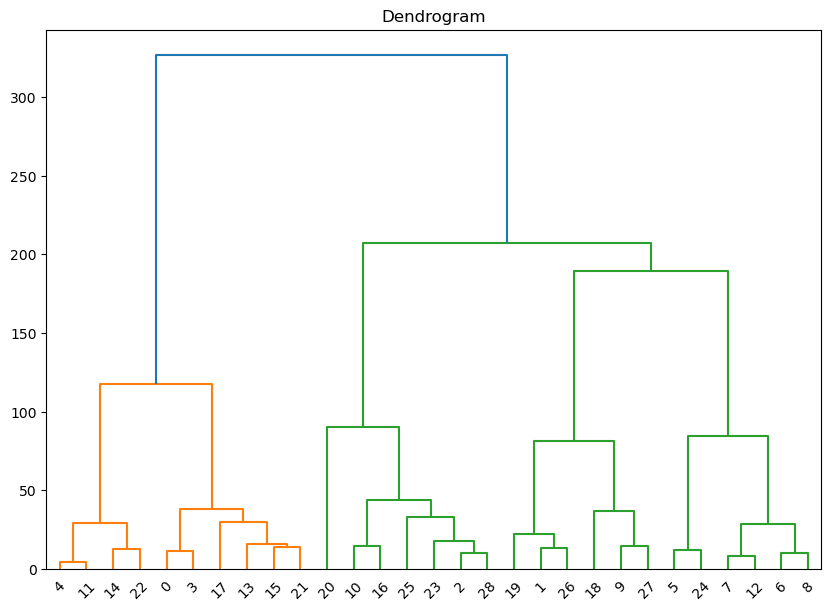

In [11]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
selected_data = X
labels = shc.linkage(X, method='ward', metric="euclidean")
shc.dendrogram(Z=labels)
plt.show()

## 5. Function

Write a function that:
1. Takes as arguments: model class of clustering, its parameters, the name of the parameter for optimization, the range of the parameter values to try.
2. Tries different values from the given parameter range and calculates the `silhouette_score` for each value from the range.
3. Finds out the best value for the parameter in the range.
4. Returns two subplots:


- - the first shows how the `silhouette_score` changes depending on the value of the parameter,
- - the second visualizes the data on a `scatter plot` using the clustering model with the best value of the parameter.

In [15]:
def optimize_clastering_parameter(model_class, params, param_name, param_range):
    scores = []
    best_param = None
    best_score = 0
    for value in param_range:
        params.update({param_name : value})
        model = model_class(**params)
        labels = model.fit_predict(X)
        silhouette_avg = silhouette_score(X, labels)
        scores.append(silhouette_avg)
        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_param = value
    
    plt.figure(figsize=(15, 8))
    plt.subplot(1,2,1)
    plt.plot(param_range, scores, marker='o')
    plt.xlabel(param_name.capitalize())
    plt.ylabel('Silhouette Score')
    plt.title(f'Silhouette Score changes')

    params.update({param_name: best_param})
    model = model_class(**params)
    labels = model.fit_predict(X)
    
    plt.subplot(1,2,2)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette="Set2")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(f'Best {param_name} Value: {best_param}')
    plt.show()
    return best_param, best_score

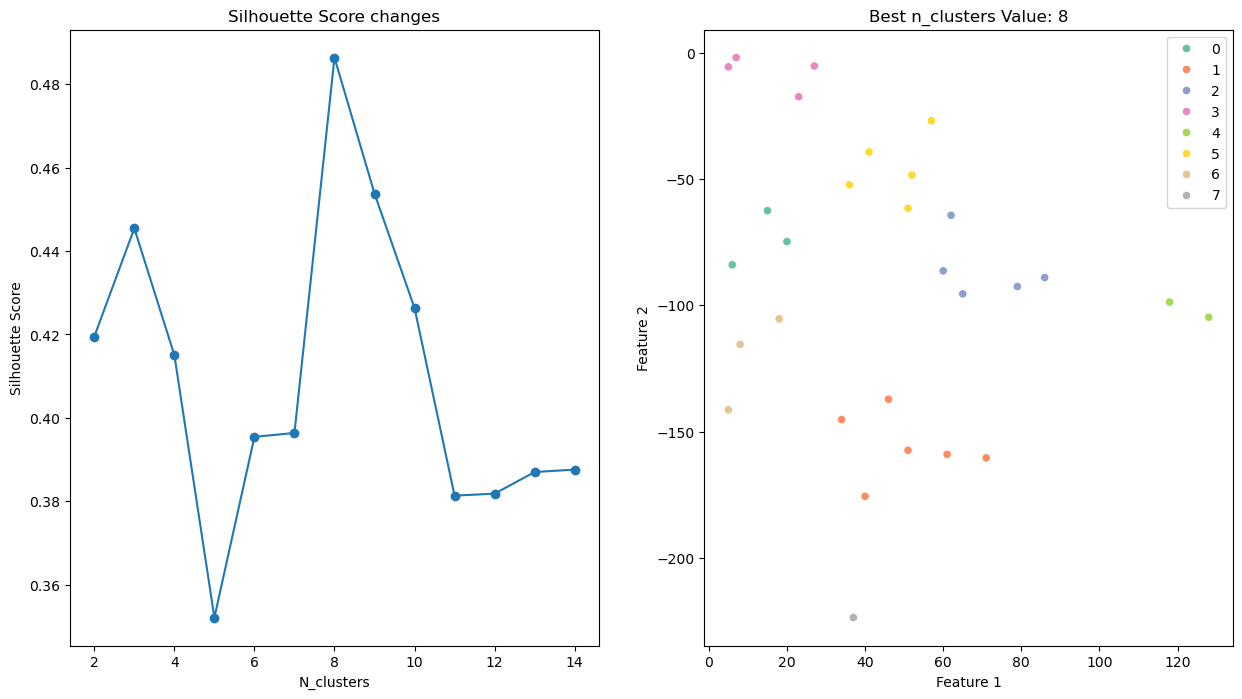

(8, 0.48638087320227846)

In [16]:
X = df[['num_commits','AVG(diff)']].values
optimize_clastering_parameter(KMeans,{'random_state': 21}, 'n_clusters', list(range(2,15)))

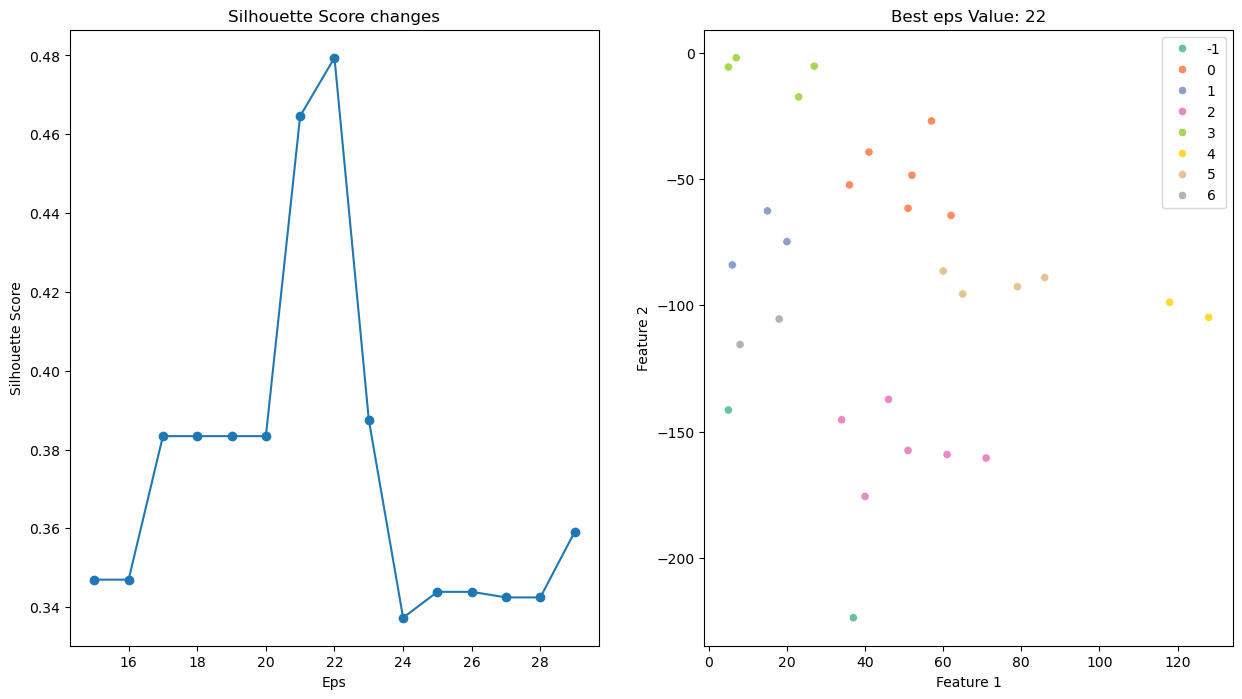

(22, 0.4794129092034348)

In [17]:
optimize_clastering_parameter(DBSCAN,{'min_samples': 2}, 'eps', list(range(15,30)))

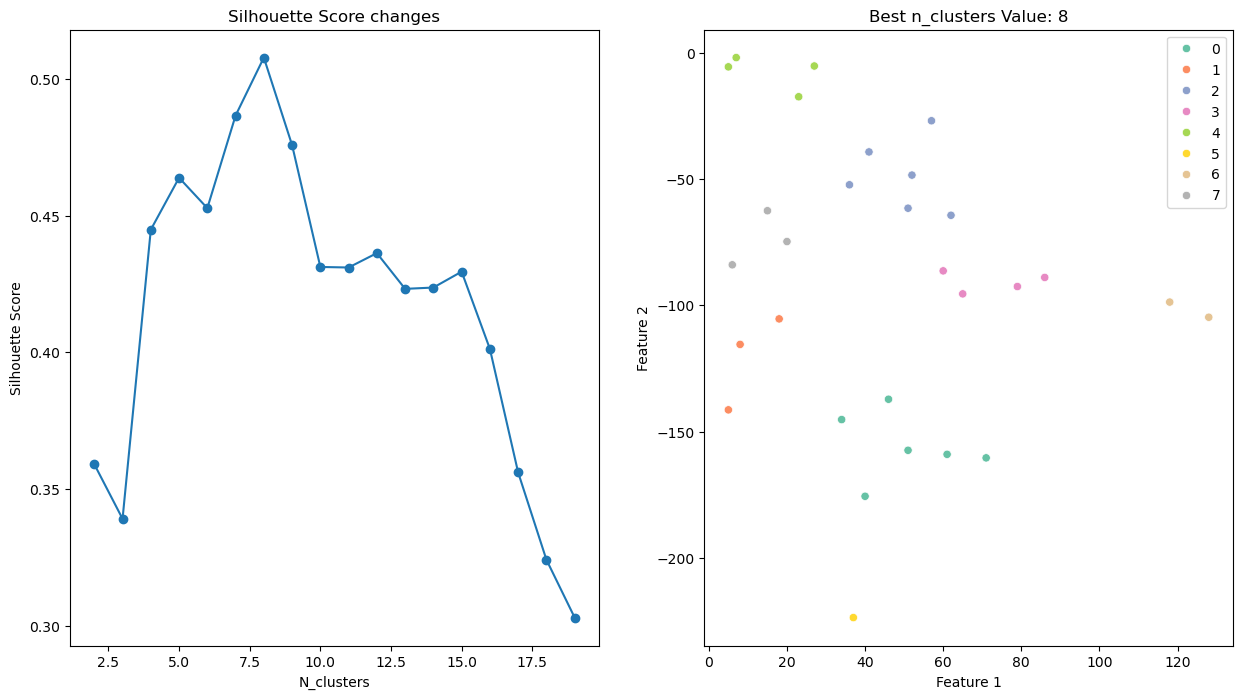

(8, 0.5077985556562201)

In [18]:
optimize_clastering_parameter(AgglomerativeClustering,{}, 'n_clusters', list(range(2,20)))